In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.shape

(6497, 13)

### Duplicated Values

In [4]:
df.duplicated().sum() 

1168

**Dropping Duplicates**

In [5]:
df.drop_duplicates(inplace = True) 

In [6]:
df.duplicated().sum() 

0

In [7]:
df.shape

(5329, 13)

### Missing Values

              index         0
0     fixed acidity  0.187652
5                pH  0.168887
1  volatile acidity  0.150122
6         sulphates  0.075061
2       citric acid  0.056296
3    residual sugar  0.037530
4         chlorides  0.037530


<AxesSubplot:xlabel='Per Nan Values', ylabel='col_name'>

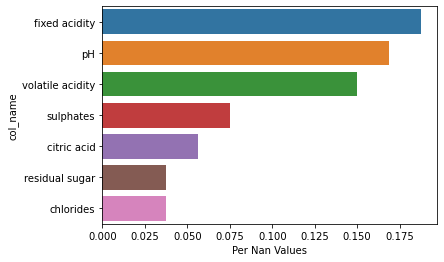

In [8]:
col_na = df.isna().any()
col_na = col_na[col_na].index.tolist()
col_na_df = (df[col_na].isna().sum()*100/ len(df) ).reset_index().sort_values(ascending = False , by = 0)
print(col_na_df)
col_na_df.columns = ['col_name' , 'Per Nan Values']
sns.barplot(x = 'Per Nan Values' , y = 'col_name' ,data = col_na_df)

Missings values are less than 5%. so we can fill Nan values with mean or median.

In [9]:
#filling missings valuues with mean of that columns
for i in col_na:
    df[i]= df[i].fillna(df[i].mean())

In [10]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.shape

(5329, 13)

### Feature Engineering 

In [12]:
df['quality'].value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

In [13]:
def extract_features(x):
    if x>=3 and x<=5:
        return 'Low'
    elif x>5 and x<=7:
        return 'Medium'
    elif x>7:
        return 'High'

In [14]:
# df['quality'] = df['quality'].apply(extract_features)

In [15]:
# print(df['quality'].value_counts())
# sns.countplot(df['quality'])

### EDA

white    3970
red      1359
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

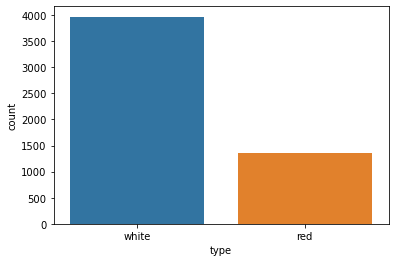

In [16]:
print(df['type'].value_counts())
sns.countplot(df['type'])

In [20]:
df_num = df.select_dtypes(exclude = 'O')
df_num.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [28]:
df_num.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

### Correlation

In [41]:
abs(df.corr()['quality']).sort_values(ascending = False)

quality                 1.000000
alcohol                 0.469555
density                 0.326978
volatile acidity        0.264203
chlorides               0.202318
citric acid             0.098764
fixed acidity           0.080554
residual sugar          0.057279
free sulfur dioxide     0.054456
total sulfur dioxide    0.050387
sulphates               0.041390
pH                      0.039953
Name: quality, dtype: float64

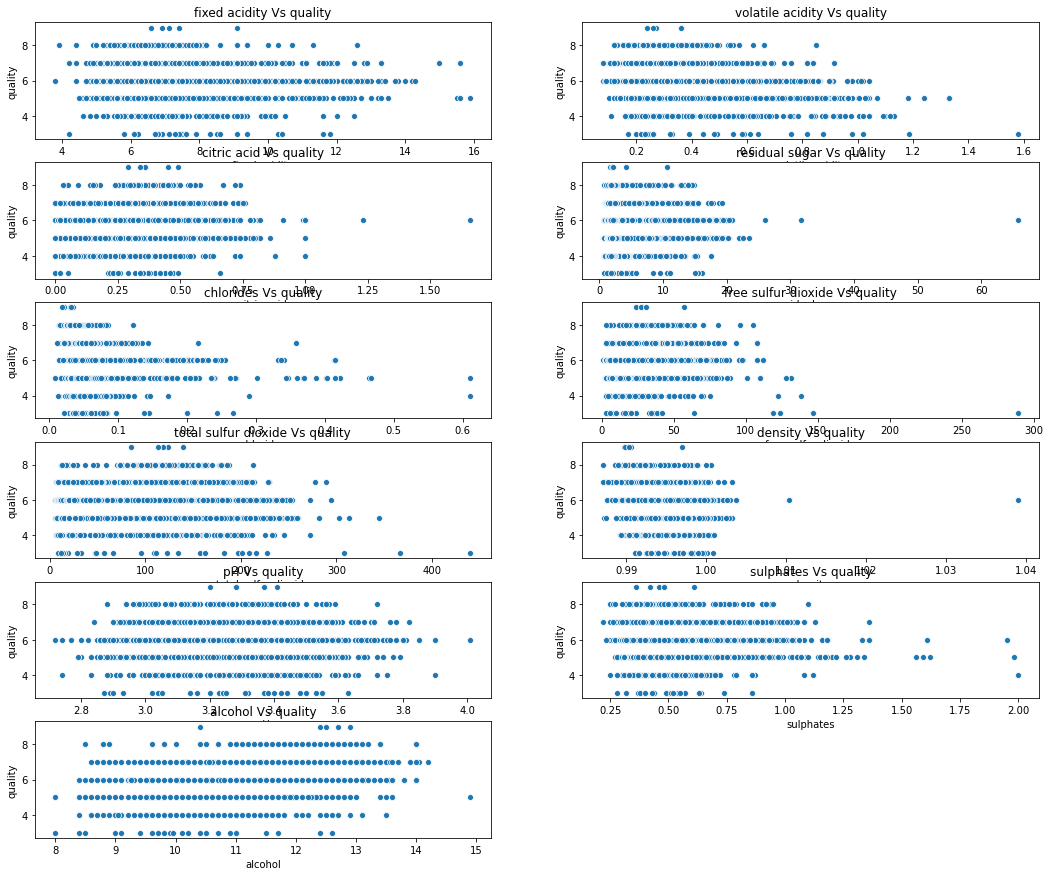

In [36]:
# plt.figure(figsize = (18,15))
# for i , col in enumerate(df_num.columns[:-1]):
#     plt.subplot(6, 2 , i+1)
#     plt.title('{} Vs quality'.format(col) )
#     sns.scatterplot(x = col , y = 'quality' , data = df)